# Импорт библиотек и подгрузка данных

In [1]:
# импортируем библиотеки для работы с данными, математических преобразований
# и для визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# читаем в переменную датасет для работы с данными
sber_data = pd.read_csv('data/sber_data.csv', sep=',')

# Метод ручного поиска и здравого сымсла

In [11]:
# смотрим на наличие выбросов
display(sber_data['life_sq'].describe())
# смотрим на количестов строк со значением 0
display(sber_data[sber_data['life_sq'] == 0].shape[0])
# также рассмотрим еще одну аномалию
display(sber_data[sber_data['life_sq'] > 7000])
# увидим сколько бывает записей 
# где жилая площадь life_sq больше общей площади full_sq
outliners = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
# смотрим на количество выбросов
display(outliners.shape[0])
# удаляем записи о них красивым способом
# при помощи .drop и его аргумента с .index
cleaned = sber_data.drop(outliners.index, axis=0)
# красивая печать вывода
print(f'Результируещее число записей: {cleaned.shape[0]}')
# видим, что есть еще аномалии в количестве этажей
display(sber_data['floor'].describe())
# узнаем сколько записей у которых высота больше 50 этажей
display(sber_data[sber_data['floor'] > 50])

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

45

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


37

Результируещее число записей: 30434


count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


# Метод межквартильного размаха (Метод Тьюки)

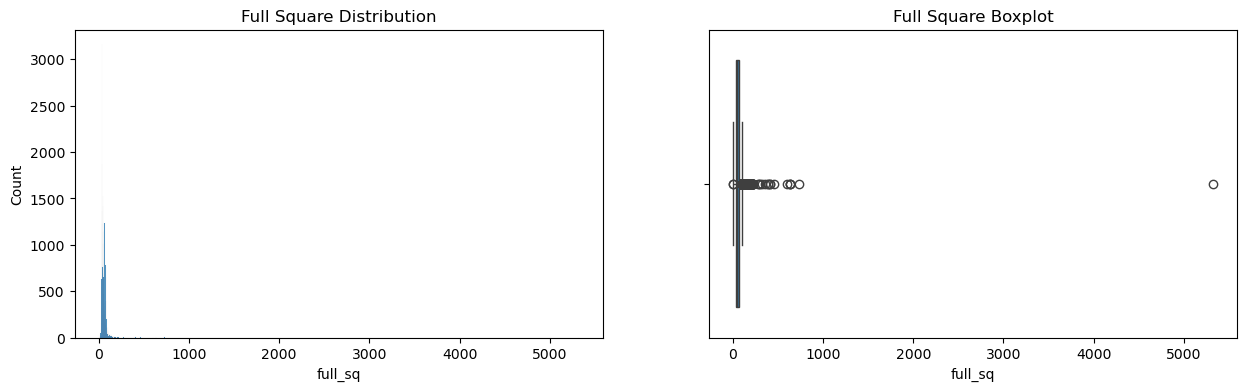

In [15]:
# описываем холст для того, чтобы мы посмотрели на наличие выбросов
# сразу и на гистограмме и на коробчатой диаграмме
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# визуализируем гистаграмму
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
# отображаем коробчатую диграмму
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

## .quantile()

In [ ]:
# создаем функцию, которая примет датафрейм и признак, 
# а вернет датафрейм только с выбросами и датафйрем очищенный от выбросов 
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    # фильтруем таблицу и осталяем только те ячейки данных которые
    # меньше числа lower_bound - нижняя граница Тьюки и
    # больше числа upper_bound - верхняя граница Тьюки
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

# применим фнкцию и узнаем сколько записей в датафреймах
outliners, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliners.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


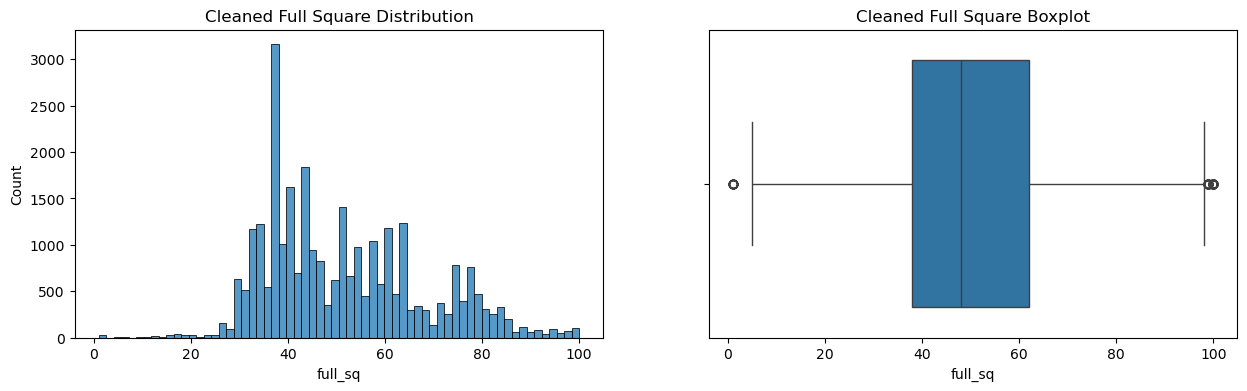

In [21]:
# строим гистаграмму и коробчатую диаграмму, 
# которая тоже будет иметь свои выбросы,
# но данный уже будут очищенны более не менее
# описываем холст
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# визуализируем гистаграмму
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
# отображаем коробчатую диграмму
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

# Метод z-отклоноений (Метод сигм)

## .np.log()

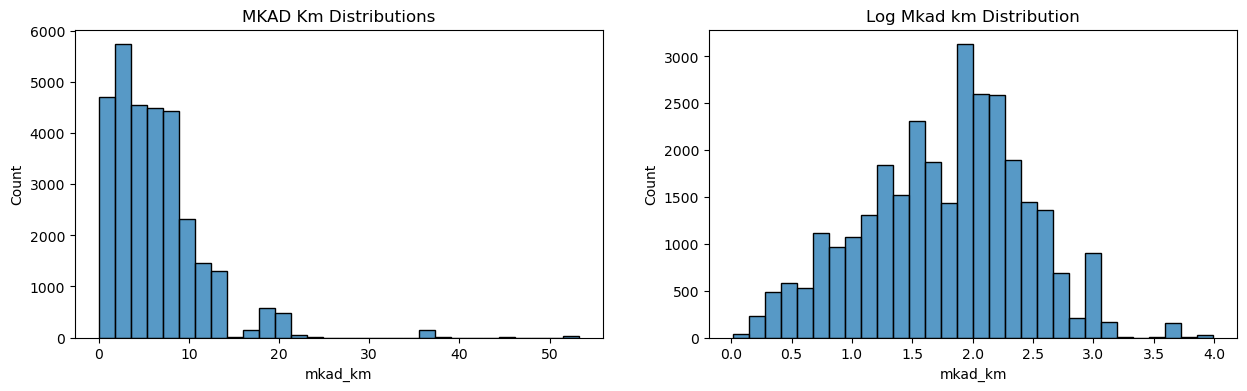

In [36]:
# холст нужен для того чтобы визуализировать графики
# описываем холт для логонормальной гистограммы и для
# прологорифмированной гистрограммы
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# демонстрирруе гистограмму
histplot = sns.histplot(data=sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distributions');

# чертим гистограмму в логорифмическом масштабе
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(data=log_mkad_km, bins=30, ax=axes[1])
histplot.set_title('Log Mkad km Distribution');

## .skew()

In [ ]:
# отображаем ассимитрию левой гистограммы для того чтобы увидеть, 
# что ассиметрия левосторонняя
# если число после использования метода scew() положительная, 
# то ассиметрия является положительной
print(log_mkad_km.skew())

-0.14263612203024983


In [ ]:
# пишем функцию, которая будет возвращать ряд выбросов и очищенный ряд
# и дополнительно будет проводить вычисления в логорифмическом масштабе
# если потребуется
def outlies_z_score(data, feature, log_scale=False):
    # если аргумент log scale True, то логарифмируем требуемы столбец
    if log_scale:
        # получим правельный логорифмированный столбец с учетом того,
        # что при логорифмированнии могут получиться 0
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    # вычисляем среднее значение и стндартное отклонение 
    # для того чтобы при помощи формулы z-отклонений найти выбросы и
    # очистить признак
    mu = x.mean()
    sigma = x.std()
    # находим нижние и верхние границы, 
    # в случае если за пределы которых будет находиться данные -
    # они будут считаться выбросами
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    # возвращаем ряд выбросов и ряд без выбросов
    return outliers, cleaned

# вкладываем в переменные 
outliers, cleaned = outlies_z_score(sber_data, 'mkad_km', log_scale=True)
# понятым способом печаьаем результирующие ряды
print(f'Результирующее количетво выбросов по методу 3-сигм: {outliers.shape[0]}')
print(f'Результирующее колтчестао записей: {cleaned.shape[0]}')

# смотрим на название районов по выбросам
print(outliers['sub_area'].unique())



Результирующее количетво выбросов по методу 3-сигм: 33
Результирующее колтчестао записей: 30438
['Poselenie Rogovskoe' 'Poselenie Kievskij']


## .axvline()

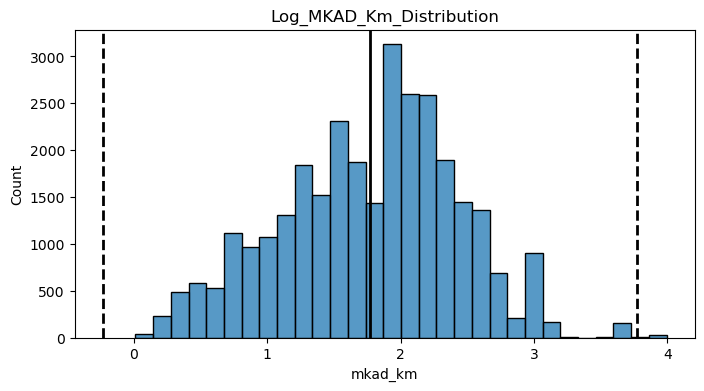

In [50]:
# начертим линии соответсвующие верхней и нижней границей и 
# стреднюю для лучшего понимания
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# в переменую записываем прологорифмированный ряд
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
# чертим гистограмму
histplot = sns.histplot(data=log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean() + 3 * log_mkad_km.std(), lw=2, ls='--', \
    color='k')
histplot.axvline(log_mkad_km.mean() - 3 * log_mkad_km.std(), lw=2, ls='--', \
    color='k')
histplot.set_title('Log_MKAD_Km_Distribution');